In [131]:
import pandas as pd
import numpy as np
import pyperclip as pc

# ___________________________________________________________________
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as ms
from sklearn import datasets, svm, metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# ____________________________________________________________________
from scipy import stats
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import chart_studio.plotly as py
import cufflinks as cf
import datetime as dt

#_____________________________________________________________________
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

from joblib import Parallel, delayed
import multiprocessing
from IPython.display import display, clear_output
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import json

#___________________________________________________________________
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
cf.go_offline()

# tls.set_credentials_file(username='marcelofprado', api_key='cftsFWfYZ7DgpGQtDuRe')
# init_notebook_mode(connected=True)

np.seterr(divide='ignore')

{'divide': 'ignore', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [217]:
resp = pd.read_csv('respirators_brazil.csv')
resp_sum = resp['equipments'].sum()
resp_sum

65411.0

In [243]:
italy_data = pd.read_csv('20200322_covid_data_italy.csv')
italy_data = italy_data[['totale_casi', 'deceduti','ricoverati_con_sintomi', 'totale_ospedalizzati', 'totale_attualmente_positivi']]
italy_data.columns = ['cases','deaths', 'recovered', 'hospitalized', 'active_cases']
# italy_data

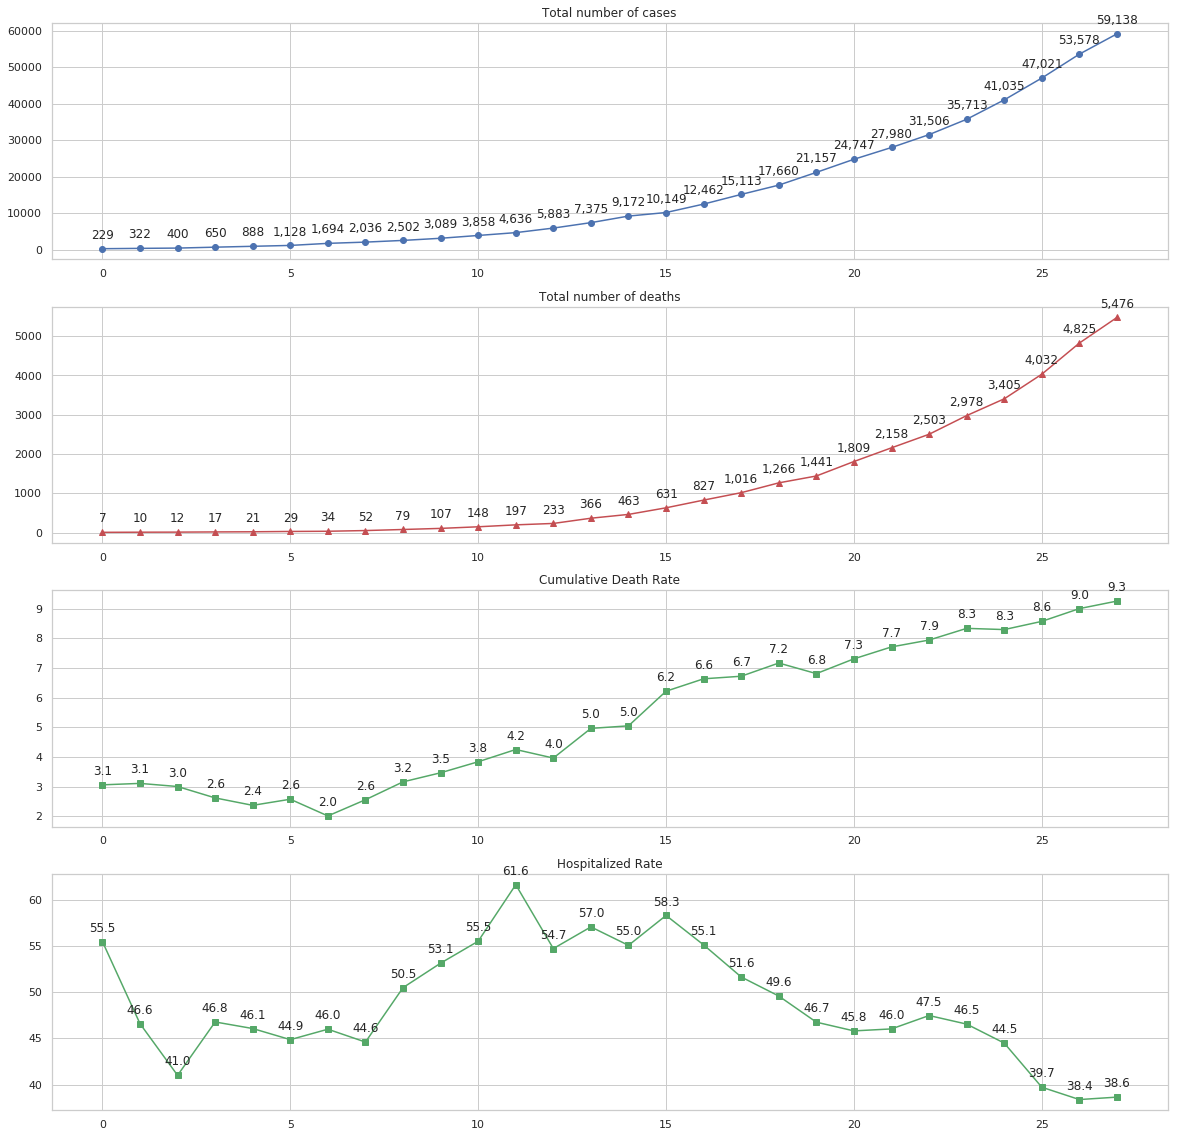

In [244]:
plt.figure(figsize = (20,20))

# plt.gca().title('Italian Cases')

plt.subplot('411')
xs = italy_data.index.values
ys = italy_data['cases']
plt.gca().set_title('Total number of cases')
plt.plot(xs, ys, 'bo-')
for x,y in zip(xs,ys):
    label = "{:,.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.subplot('412')
plt.gca().set_title('Total number of deaths')
ys = italy_data['deaths']
plt.plot(xs, ys, 'r^-')
for x,y in zip(xs,ys):
    label = "{:,.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.subplot('413')
plt.gca().set_title('Cumulative Death Rate')
ys = italy_data['deaths'] / italy_data['cases'] * 100
plt.plot(xs, ys, 'gs-')
for x,y in zip(xs,ys):
    label = "{:.1f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.subplot('414')
plt.gca().set_title('Hospitalized Rate')
ys = italy_data['hospitalized'] / italy_data['cases'] * 100
plt.plot(xs, ys, 'gs-')
for x,y in zip(xs,ys):
    label = "{:.1f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.savefig('italian_overview')
plt.show()

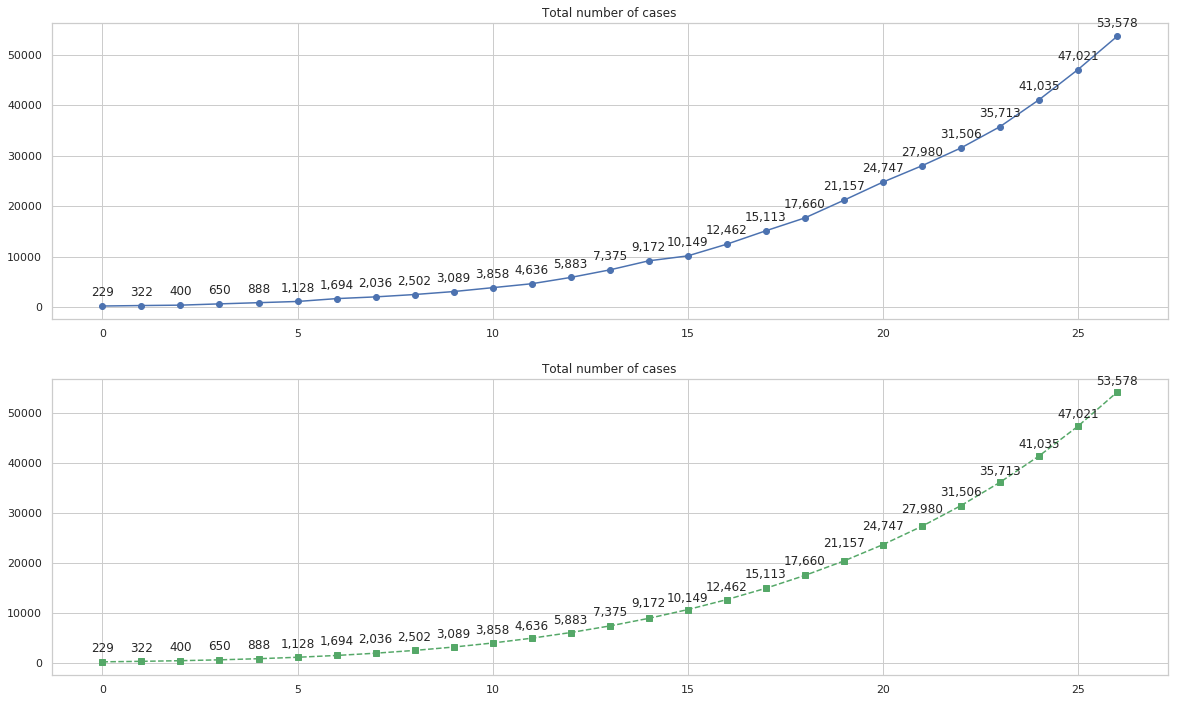

In [144]:
ys = italy_data['cases']
xs = italy_data.index.values
p = np.poly1d(np.polyfit(xs, np.log(ys), 3))
# xs = range(0,100)
yse = p(xs)

plt.figure(figsize = (20,12))

plt.subplot('211')
plt.gca().set_title('Total number of cases')
plt.plot(xs, ys, 'bo-')
for x,y in zip(xs,ys):
    label = "{:,.1f}".format(y / 1000)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.subplot('212')
plt.gca().set_title('Total number of cases')
plt.plot(xs, np.exp(yse), 'gs--')
for x,y in zip(xs,ys):
    label = "{:,.1f}".format(y / 1000)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [245]:
data = np.array([
    [1,1,1,1,2,2,2,2,3,8,13,19,25,25,34,52,77,151,151,200,234,346,529,640,970,1178, 1546],
    [1,1,1,1,2,2,2,2,3,8,13,19,25,25,34,52,77,150,150,198,232,343,523,631,957,1158, 1519],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,7,11,18,25],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0]]
).transpose()
cols = ['cases', 'active_cases', 'deaths', 'recovered']

brazil_data = pd.DataFrame(data, columns = cols)
brazil_data = brazil_data[20:].reset_index()
brazil_data.to_csv('covid_data_brazil.csv')
# brazil_data

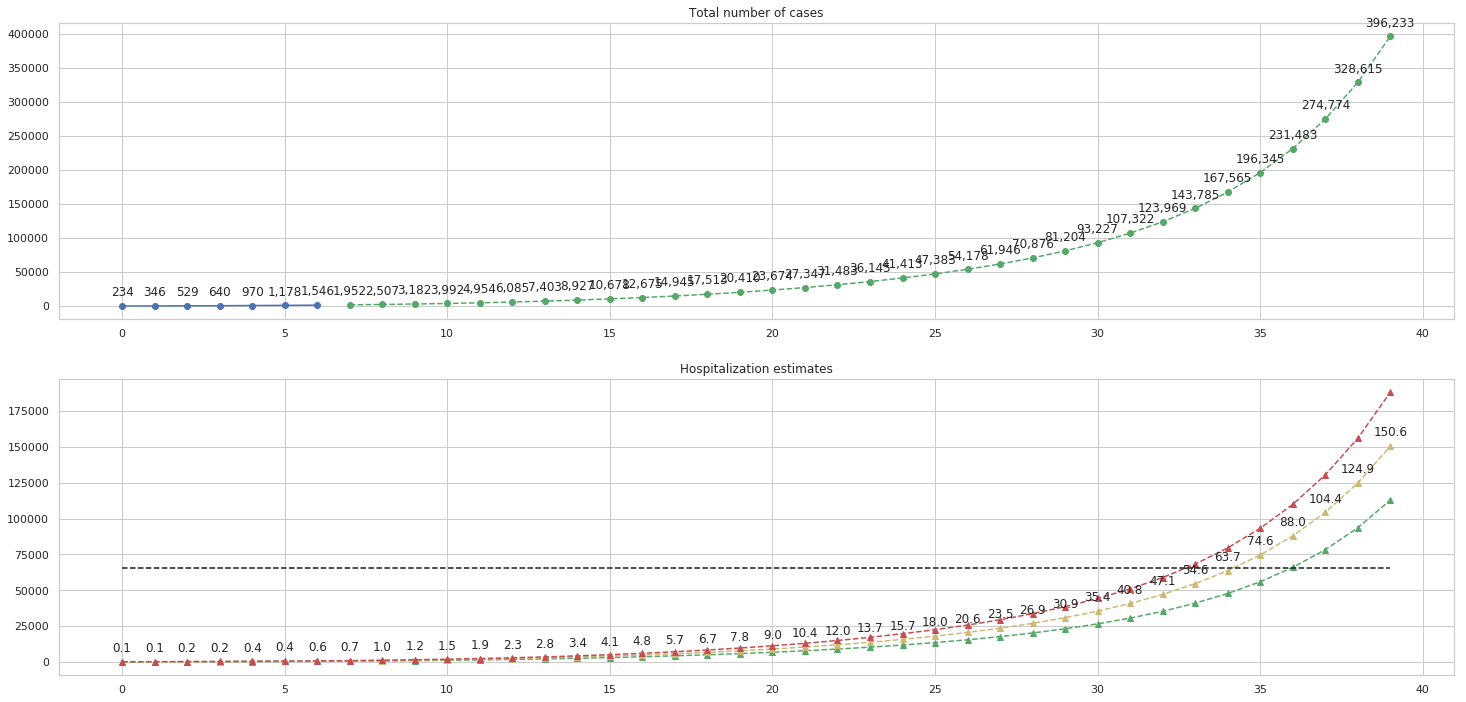

In [246]:
plt.figure(figsize = (25,12))

# plt.gca().title('Italian Cases')
n = 40
xs = range(0,n)
yse = p(range(len(brazil_data), n))
zs = (brazil_data['cases'].append(pd.Series(np.exp(yse)))).reset_index(drop = True)
ys = (brazil_data['cases'].append(pd.Series(np.nan for i in range(0,len(yse))))).reset_index(drop=True)
yse = (pd.Series(np.nan for i in range(0,len(brazil_data))).append(pd.Series(p(range(len(brazil_data), n))))).reset_index(drop=True)

plt.subplot('211')
plt.gca().set_title('Total number of cases')
plt.plot(xs, ys, 'bo-', np.exp(yse), 'go--')
for x,y in zip(xs,zs):
    label = "{:,.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.subplot('212')
plt.gca().set_title('Hospitalization estimates')
est1 = zs * 0.3 - zs * 0.015
est2 = zs * 0.4 - zs * 0.02
est3 = zs * 0.5 - zs * 0.025
resp_line = [resp_sum for i in range(0, n)]
plt.plot(xs, est1, 'g^--', est2, 'y^--', est3, 'r^--', resp_line, 'k--')
# for x,y in zip(xs,est1):
#     label = "{:,.1f}".format(y / 1000)
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center
    
for x,y in zip(xs,est2):
    label = "{:,.1f}".format(y / 1000)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
# for x,y in zip(xs,est3):
#     label = "{:,.1f}".format(y / 1000)
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center
    
plt.savefig('brazil_forecast')
plt.show()

In [251]:
data = np.array([
    [15,15,15,15,15,15,35,35,35,53,57,60,63,68,75,100,124,158,221,319,435,541,704,994,1301,1697,2247,2943,3680,4663,6411,9259,13789,19383,26111,32356],
    [15,15,15,15,15,15,35,35,35,51,54,54,57,60,65,85,106,138,200,289,401,504,663,949,1248,1625,2157,2830,3553,4503,6196,9003,13474,18980,23729,31764],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,9,11,12,15,19,22,26,30,38,41,49,57,68,86,109,150,207,256,324],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,10,15,3,15,32,0,2,39]]
).transpose()
cols = ['cases', 'active_cases', 'deaths', 'recovered']

us_data = pd.DataFrame(data, columns = cols)

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

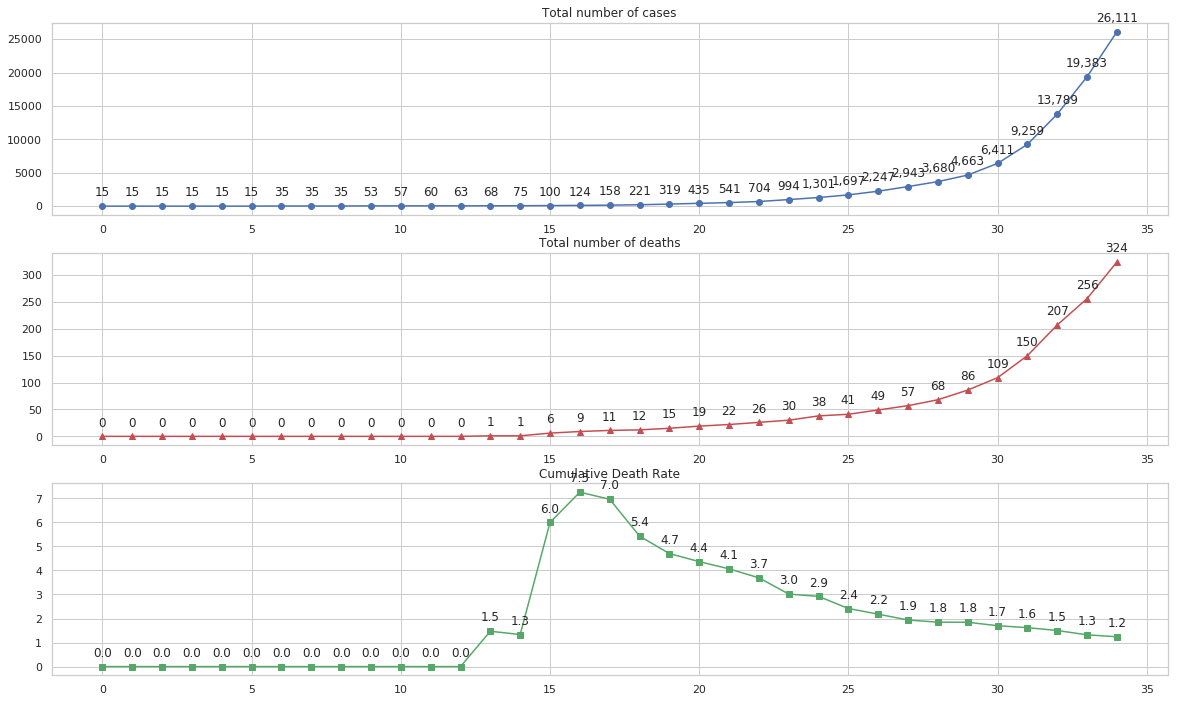

In [238]:
plt.figure(figsize = (20,12))

# plt.gca().title('Italian Cases')

plt.subplot('311')
xs = us_data.index.values
ys = us_data['cases']
plt.gca().set_title('Total number of cases')
plt.plot(xs, ys, 'bo-')
for x,y in zip(xs,ys):
    label = "{:,.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.subplot('312')
plt.gca().set_title('Total number of deaths')
ys = us_data['deaths']
plt.plot(xs, ys, 'r^-')
for x,y in zip(xs,ys):
    label = "{:,.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.subplot('313')
plt.gca().set_title('Cumulative Death Rate')
ys = us_data['deaths'] / us_data['cases'] * 100
plt.plot(xs, ys, 'gs-')
for x,y in zip(xs,ys):
    label = "{:.1f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.savefig('us_overview')
plt.show()